# Jupyter Notebook for Oura Ring Sleepdata

## Introduction
Oura provides data that can be retrieved from their website with an API call.
There are three parameters that are available in 5 minute intervals: sleep stage, heart rate (hr) and heart rate variability (HRV). 
With this notebook you can retrieve data and load it into a Pandas df.
Then, do some simple analysis and create some graphs.

Create an account and get your credentials from the Oura Documents page: https://cloud.ouraring.com/docs

## Contents:

0. Installation and tokens
1. Sleep API call and load (some) data into Pandas df
2. Basic analysis
3. Create some graphs with it
4. Store the dataframe

## 0. Installation and tokens

In [3]:
!pip install oura

  Using cached oura-1.1.4-py2.py3-none-any.whl (11 kB)


In [2]:
from oura import OuraClient
# get your credentials from oura, see: https://cloud.ouraring.com/docs/.
# You will need a client_id, client_secret and a personal access token (PAT). 

import notebooks_config
#I store all my credentials in a notebooks_config.py file. 
#This file is then included in the .gitignore list so I can share the notebooks on GitHub.  

oura_pat = notebooks_config.oura_pat #
oura_client_id = notebooks_config.oura_client_id
oura_client_secret = notebooks_config.oura_client_secret

client = OuraClient(personal_access_token=oura_pat)
oura = OuraClient(oura_client_id, oura_client_secret, oura_pat)
print('done')

done


## 1. Sleep API call

In [3]:
#get your personal info
oura.user_info()

{'age': 45,
 'weight': 93.0,
 'height': 180,
 'gender': 'male',
 'email': 'michiel.bontenbal@gmail.com'}

In [4]:
# Sleep Summary
result = oura.sleep_summary(start='2021-12-11', end='2021-12-12')
data = result['sleep'][0] #select the first item from the list
print(data)

{'summary_date': '2021-12-11', 'period_id': 0, 'is_longest': 1, 'timezone': 60, 'bedtime_end': '2021-12-12T09:00:31+01:00', 'bedtime_start': '2021-12-11T23:02:31+01:00', 'breath_average': 15.375, 'duration': 35880, 'total': 30510, 'awake': 5370, 'rem': 8670, 'deep': 4800, 'light': 17040, 'midpoint_time': 18150, 'efficiency': 85, 'restless': 25, 'onset_latency': 270, 'hr_5min': [0, 64, 64, 62, 63, 63, 63, 63, 63, 63, 0, 0, 59, 61, 59, 57, 57, 56, 57, 0, 57, 57, 58, 57, 0, 60, 61, 0, 62, 61, 59, 0, 0, 0, 58, 55, 56, 57, 59, 61, 62, 61, 59, 58, 57, 0, 0, 0, 0, 62, 56, 56, 54, 55, 0, 0, 58, 58, 57, 0, 0, 0, 0, 0, 0, 0, 60, 62, 61, 60, 61, 61, 62, 62, 61, 58, 59, 58, 60, 59, 60, 59, 58, 60, 0, 0, 58, 58, 0, 0, 59, 0, 60, 59, 58, 56, 58, 58, 56, 57, 57, 56, 57, 58, 59, 60, 60, 58, 57, 58, 59, 58, 58, 58, 58, 59, 59, 58, 60, 63], 'hr_average': 59.06, 'hr_lowest': 54.0, 'hypnogram_5min': '4222222332421222221222233331222111221223112232224422244422444444442221111112223332233333333333223222223333

### 1a. Get the start and endtime of sleep

In [5]:
#get the start and endtime as strings
start_time = data['bedtime_start']
end_time = data['bedtime_end']
# convert strings to datetime
from dateutil import parser
start_time_dt = parser.parse(start_time)
end_time_dt = parser.parse(end_time)
print ('start time is '+ str(start_time_dt) + ' and end time is ' + str(end_time_dt))

start time is 2021-12-11 23:02:31+01:00 and end time is 2021-12-12 09:00:31+01:00


### 1b. Get the hypnogram and convert it to a list of integers

In [6]:
#get the hypnogram as one long string
hypnogram = data['hypnogram_5min']

# convert the hypnogram to a list of strings
string_list=[]
string_list[:0]=hypnogram

# convert the list of strings to a list of integers
my_stages=[] #create an empty list for the sleep stages
for i in range(len(string_list)):
    integer = int(string_list[i])
    my_stages.append(integer)
print(my_stages)

[4, 2, 2, 2, 2, 2, 2, 3, 3, 2, 4, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 4, 4]


### 1c. Get the HR and HRV for 5 min intervals

In [7]:
my_hr = data['hr_5min']
print(my_hr)

[0, 64, 64, 62, 63, 63, 63, 63, 63, 63, 0, 0, 59, 61, 59, 57, 57, 56, 57, 0, 57, 57, 58, 57, 0, 60, 61, 0, 62, 61, 59, 0, 0, 0, 58, 55, 56, 57, 59, 61, 62, 61, 59, 58, 57, 0, 0, 0, 0, 62, 56, 56, 54, 55, 0, 0, 58, 58, 57, 0, 0, 0, 0, 0, 0, 0, 60, 62, 61, 60, 61, 61, 62, 62, 61, 58, 59, 58, 60, 59, 60, 59, 58, 60, 0, 0, 58, 58, 0, 0, 59, 0, 60, 59, 58, 56, 58, 58, 56, 57, 57, 56, 57, 58, 59, 60, 60, 58, 57, 58, 59, 58, 58, 58, 58, 59, 59, 58, 60, 63]


In [8]:
# get the metric for heart rate variability also know as rMSSD
my_HRV = data['rmssd_5min']
print(my_HRV)

[0, 33, 22, 34, 35, 31, 31, 31, 33, 36, 0, 0, 30, 37, 45, 41, 37, 35, 34, 0, 33, 33, 31, 32, 0, 32, 40, 0, 39, 33, 46, 0, 0, 0, 39, 33, 37, 39, 24, 17, 18, 27, 38, 27, 20, 0, 0, 0, 0, 37, 47, 39, 31, 53, 0, 0, 56, 75, 83, 0, 0, 0, 0, 0, 0, 0, 36, 31, 38, 35, 28, 27, 25, 25, 35, 42, 34, 38, 31, 30, 35, 49, 36, 41, 0, 0, 35, 31, 0, 0, 44, 0, 32, 38, 44, 34, 19, 39, 40, 52, 54, 37, 29, 36, 41, 37, 37, 45, 44, 32, 31, 38, 32, 38, 43, 40, 43, 43, 34, 28]


### 1d. Create a list of starttime of the intervals

In [10]:
import datetime
time_change = datetime.timedelta(minutes=5)
my_startivs = [start_time_dt]
new_iv=start_time_dt
for i in range(len(my_stages)-1):
    new_iv= new_iv+time_change
    my_startivs.append(new_iv)
#print(my_startivs)
print('done')

done


### 1e. Creating a df and adding the lists to it

In [11]:
#see if all lists have same length
print(len(my_stages), len(my_hr), len(my_HRV), len(my_startivs))

120 120 120 120


In [12]:
# create an empty dataframe
import pandas as pd
sleep_df = pd.DataFrame()

# Add the lists to the dataframe
sleep_df['Start_time']=my_startivs
sleep_df['Stage']= my_stages
sleep_df['hr']=my_hr
sleep_df['HRV']=my_HRV
sleep_df

,Start_time,Stage,hr,HRV
0,2021-12-11 23:02:31+01:00,4,0,0
1,2021-12-11 23:07:31+01:00,2,64,33
2,2021-12-11 23:12:31+01:00,2,64,22
3,2021-12-11 23:17:31+01:00,2,62,34
4,2021-12-11 23:22:31+01:00,2,63,35
...,...,...,...,...
115,2021-12-12 08:37:31+01:00,2,59,40
116,2021-12-12 08:42:31+01:00,3,59,43
117,2021-12-12 08:47:31+01:00,3,58,43
118,2021-12-12 08:52:31+01:00,4,60,34


In [14]:
sleep_df.dtypes

Start_time    datetime64[ns, tzoffset(None, 3600)]
Stage                                        int64
hr                                           int64
HRV                                          int64
dtype: object

In [13]:
# replace 0's with NaN
import numpy as np
sleep_df = sleep_df.replace(0, np.NaN)
sleep_df.tail()

,Start_time,Stage,hr,HRV
115,2021-12-12 08:37:31+01:00,2,59.0,40.0
116,2021-12-12 08:42:31+01:00,3,59.0,43.0
117,2021-12-12 08:47:31+01:00,3,58.0,43.0
118,2021-12-12 08:52:31+01:00,4,60.0,34.0
119,2021-12-12 08:57:31+01:00,4,63.0,28.0


In [14]:
sleep_df.describe()

,Stage,hr,HRV
count,120.000000,93.000000,93.000000
mean,2.408333,59.064516,36.451613
std,0.893448,2.244832,9.777432
min,1.000000,54.000000,17.000000
25%,2.000000,58.000000,31.000000
50%,2.000000,59.000000,35.000000
75%,3.000000,61.000000,40.000000
max,4.000000,64.000000,83.000000


## 2. Do some basic analysis

In [15]:
hr_mean =sleep_df['hr'].mean()
HRV_mean=sleep_df['HRV'].mean()
print('Average hr is: ' + str(round(hr_mean,1))+ ' and average HRV is ' + str(round(HRV_mean,1)))

Average hr is: 59.1 and average HRV is 36.5


In [16]:
hr_min =sleep_df['hr'].min()
HRV_min=sleep_df['HRV'].min()
print('Lowest hr is: ' + str(round(hr_min,1))+ ' and Lowest HRV is ' + str(round(HRV_min,1)))

Lowest hr is: 54.0 and Lowest HRV is 17.0


In [17]:
hr_max =sleep_df['hr'].max()
HRV_max=sleep_df['HRV'].max()
print('Highest hr is: ' + str(round(hr_max,1))+ ' and highest HRV is ' + str(round(HRV_max,1)))

Highest hr is: 64.0 and highest HRV is 83.0


In [18]:
hr_median =sleep_df['hr'].median()
HRV_median=sleep_df['HRV'].median()
print('Median hr is: ' + str(round(hr_median,1))+ ' and median HRV is ' + str(round(HRV_median,1)))

Median hr is: 59.0 and median HRV is 35.0


In [19]:
deep_sleep = my_stages.count(1)
deep_sleep_perc= round((deep_sleep/len(my_stages)*100),2)
print('Deep sleep was ' + str(deep_sleep*5) + ' minutes. That is ' + str(deep_sleep_perc)+ ' % of the time.')

Deep sleep was 80 minutes. That is 13.33 % of the time.


## 3. Create graphs

In [100]:
my_counts = sleep_df['Stage'].value_counts()
my_counts

2    39
3    24
1    15
4    12
Name: Stage, dtype: int64

<AxesSubplot:title={'center':'stages'}, ylabel='Frequency'>

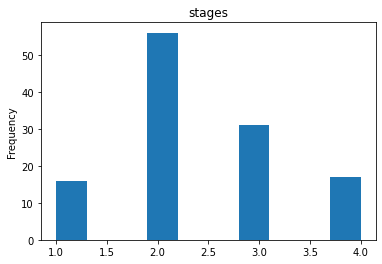

In [20]:
# for a histogram use this pattern: name_df['column'].plot.hist(title='Genome Size Histogram')
sleep_df['Stage'].plot.hist(title='stages')

<AxesSubplot:xlabel='Start_time', ylabel='hr'>

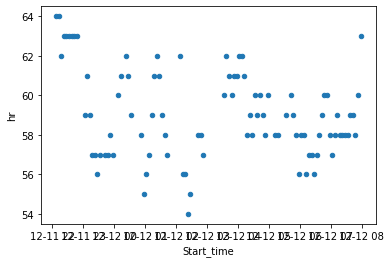

In [21]:
sleep_df.plot.scatter(x='Start_time', y='hr', s=None, c=None)

<AxesSubplot:xlabel='Start_time', ylabel='HRV'>

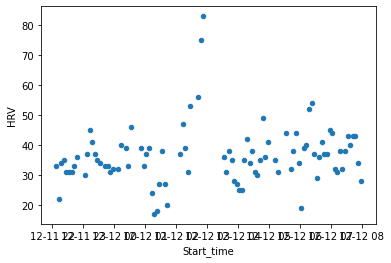

In [22]:
sleep_df.plot.scatter(x='Start_time', y='HRV', s=None, c=None)

<AxesSubplot:xlabel='Start_time', ylabel='Stage'>

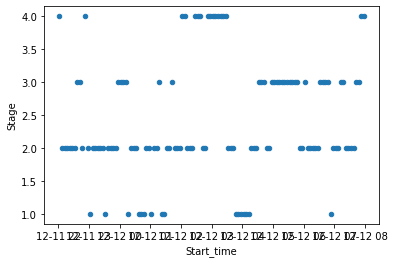

In [23]:
sleep_df.plot.scatter(x='Start_time', y='Stage', s=None, c=None)

## 4. Store df as csv

In [24]:
#naming pattern: 
sleep_df.to_csv('sleep_df_oura_202112011-12.csv')